## Initial Setup 

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(R"C:\Users\USER\Desktop\Artificial Intelligence\AI\AL\Tweets.csv")

# Display the first few rows
data.head()


## EDA and Preprocessing

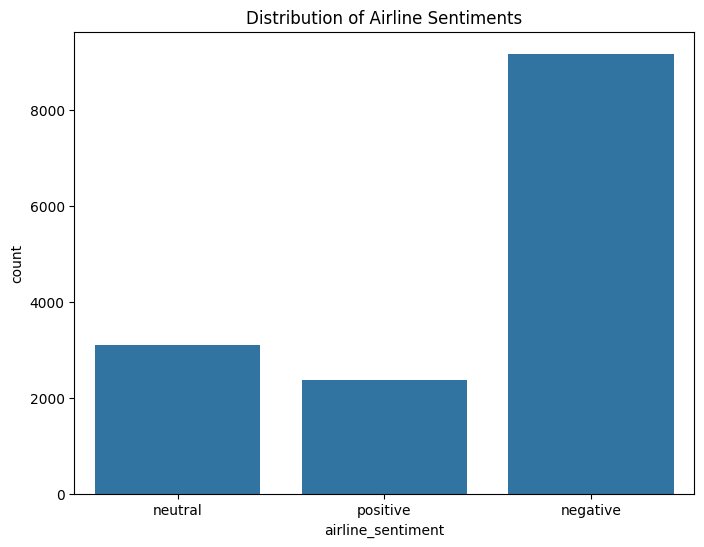

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Check for missing values
data.isnull().sum()

# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='airline_sentiment', data=data)
plt.title('Distribution of Airline Sentiments')
plt.show()

# Encode sentiment labels
label_encoder = LabelEncoder()
data['airline_sentiment'] = label_encoder.fit_transform(data['airline_sentiment'])

# Split the data into training and testing sets
X = data['text']
y = data['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text preprocessing (e.g., tokenization, padding) to be added


## Model Building

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train.values)
X_train = pad_sequences(X_train)

X_test = tokenizer.texts_to_sequences(X_test.values)
X_test = pad_sequences(X_test)

# Build the ANN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, pd.get_dummies(y_train).values, epochs=5, batch_size=64, validation_split=0.1)


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.6471 - loss: 0.8379 - val_accuracy: 0.7389 - val_loss: 0.6165
Epoch 2/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8041 - loss: 0.5044 - val_accuracy: 0.8097 - val_loss: 0.4855
Epoch 3/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.8599 - loss: 0.3685 - val_accuracy: 0.8131 - val_loss: 0.4971
Epoch 4/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.8933 - loss: 0.2939 - val_accuracy: 0.8046 - val_loss: 0.5186
Epoch 5/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9080 - loss: 0.2515 - val_accuracy: 0.8089 - val_loss: 0.5495


## Evaluation and Plotting

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
ROC AUC Score: 0.899182294533567


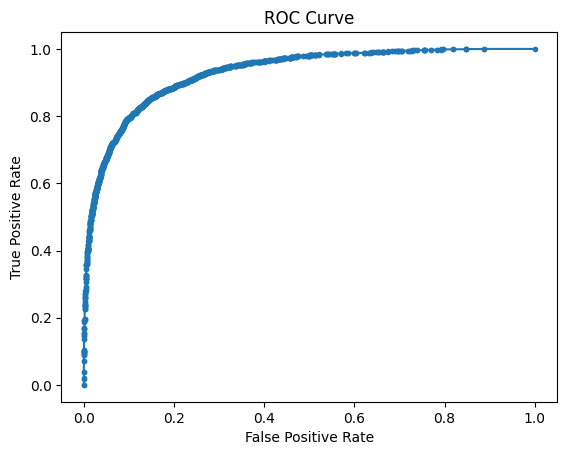

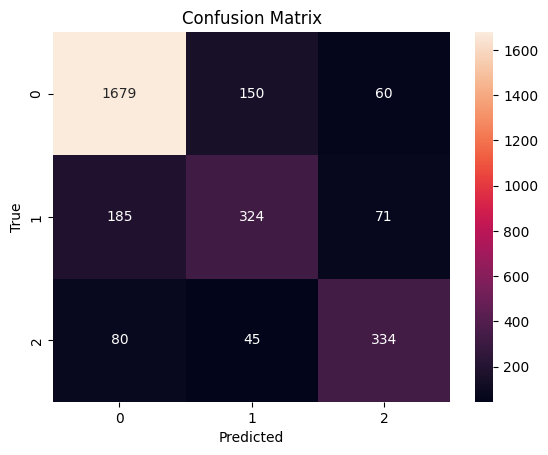

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import numpy as np

# Evaluate the model
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(pd.get_dummies(y_test).values, y_pred)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Data Preprocessing (Ensure Consistent Input Shape)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = pd.read_csv(r"C:\Users\USER\Desktop\Artificial Intelligence\AI\AL\Tweets.csv")

# Encode sentiment labels
label_encoder = LabelEncoder()
data['airline_sentiment'] = label_encoder.fit_transform(data['airline_sentiment'])

# Split the data into training and testing sets
X = data['text']
y = data['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train.values)
X_train = pad_sequences(X_train)

X_test = tokenizer.texts_to_sequences(X_test.values)
X_test = pad_sequences(X_test)


## Build and Train the RNN Model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(5000, 128, input_length=X_train.shape[1]))
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(3, activation='softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train, pd.get_dummies(y_train).values, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.6510 - loss: 0.8431 - val_accuracy: 0.7423 - val_loss: 0.5910
Epoch 2/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.8001 - loss: 0.4996 - val_accuracy: 0.8055 - val_loss: 0.4785
Epoch 3/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8693 - loss: 0.3524 - val_accuracy: 0.8217 - val_loss: 0.4804
Epoch 4/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8929 - loss: 0.3019 - val_accuracy: 0.8012 - val_loss: 0.5250
Epoch 5/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9066 - loss: 0.2544 - val_accuracy: 0.8046 - val_loss: 0.5405


## Evaluate the RNN Model

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
RNN ROC AUC Score: 0.9010640308025303


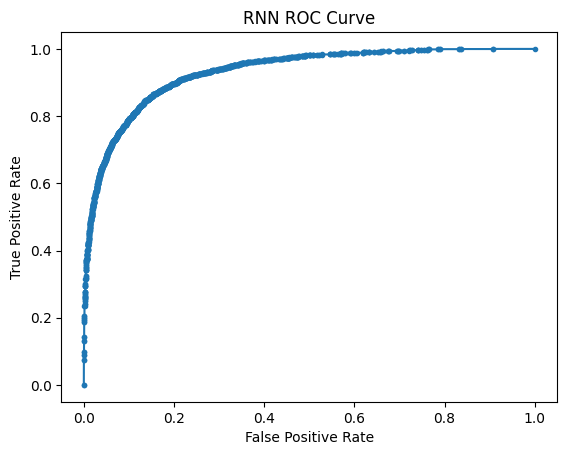

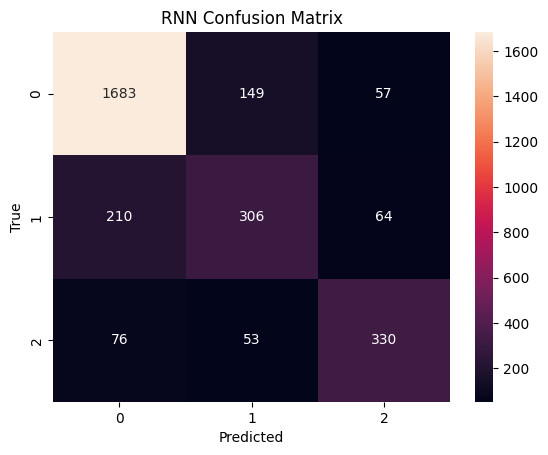

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
rnn_y_pred = rnn_model.predict(X_test)
rnn_roc_auc = roc_auc_score(pd.get_dummies(y_test).values, rnn_y_pred)
print(f'RNN ROC AUC Score: {rnn_roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), rnn_y_pred.ravel())
plt.plot(fpr, tpr, marker='.')
plt.title('RNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion matrix
rnn_cm = confusion_matrix(y_test, np.argmax(rnn_y_pred, axis=1))
sns.heatmap(rnn_cm, annot=True, fmt='d')
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Building CNN Model

In [18]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(5000, 128, input_length=X_train.shape[1]))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train, pd.get_dummies(y_train).values, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.6661 - loss: 0.7789 - val_accuracy: 0.7833 - val_loss: 0.5741
Epoch 2/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8387 - loss: 0.4102 - val_accuracy: 0.7927 - val_loss: 0.5128
Epoch 3/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9336 - loss: 0.1938 - val_accuracy: 0.7892 - val_loss: 0.6045
Epoch 4/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9766 - loss: 0.0850 - val_accuracy: 0.8055 - val_loss: 0.7452
Epoch 5/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9886 - loss: 0.0451 - val_accuracy: 0.8029 - val_loss: 0.8044


## Data Preprocessing (Ensure Consistent Input Shape)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = pd.read_csv(r"C:\Users\USER\Desktop\Artificial Intelligence\AI\AL\Tweets.csv")

# Encode sentiment labels
label_encoder = LabelEncoder()
data['airline_sentiment'] = label_encoder.fit_transform(data['airline_sentiment'])

# Split the data into training and testing sets
X = data['text']
y = data['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train.values)
X_train = pad_sequences(X_train, maxlen=100)  # Ensure consistent sequence length

X_test = tokenizer.texts_to_sequences(X_test.values)
X_test = pad_sequences(X_test, maxlen=100)  # Ensure consistent sequence length


## Build and Train the CNN Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(5000, 128, input_length=100))  # Ensure input_length matches padding
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train, pd.get_dummies(y_train).values, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.6465 - loss: 0.7927 - val_accuracy: 0.8020 - val_loss: 0.5220
Epoch 2/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.8420 - loss: 0.4135 - val_accuracy: 0.8114 - val_loss: 0.4787
Epoch 3/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9244 - loss: 0.2215 - val_accuracy: 0.8063 - val_loss: 0.5589
Epoch 4/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9710 - loss: 0.1028 - val_accuracy: 0.8063 - val_loss: 0.6717
Epoch 5/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9876 - loss: 0.0520 - val_accuracy: 0.7944 - val_loss: 0.7714


## Evaluate the CNN MODEL

## Summary:-
Data Preprocessing: Ensure that all text sequences are padded to the same length (100 in this example).
Model Building: Set the input_length of the Embedding layer to match the padded sequence length.
By making sure the input shapes are consistent, the model should train and evaluate without shape mismatches. 